In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [103]:
#Data Preparation:
df = pd.read_csv(r"C:/Arif/book_heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [21]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
#Exploratory Data Analysis (EDA):

In [5]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [6]:
df = df.dropna()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'num'}>]], dtype=object)

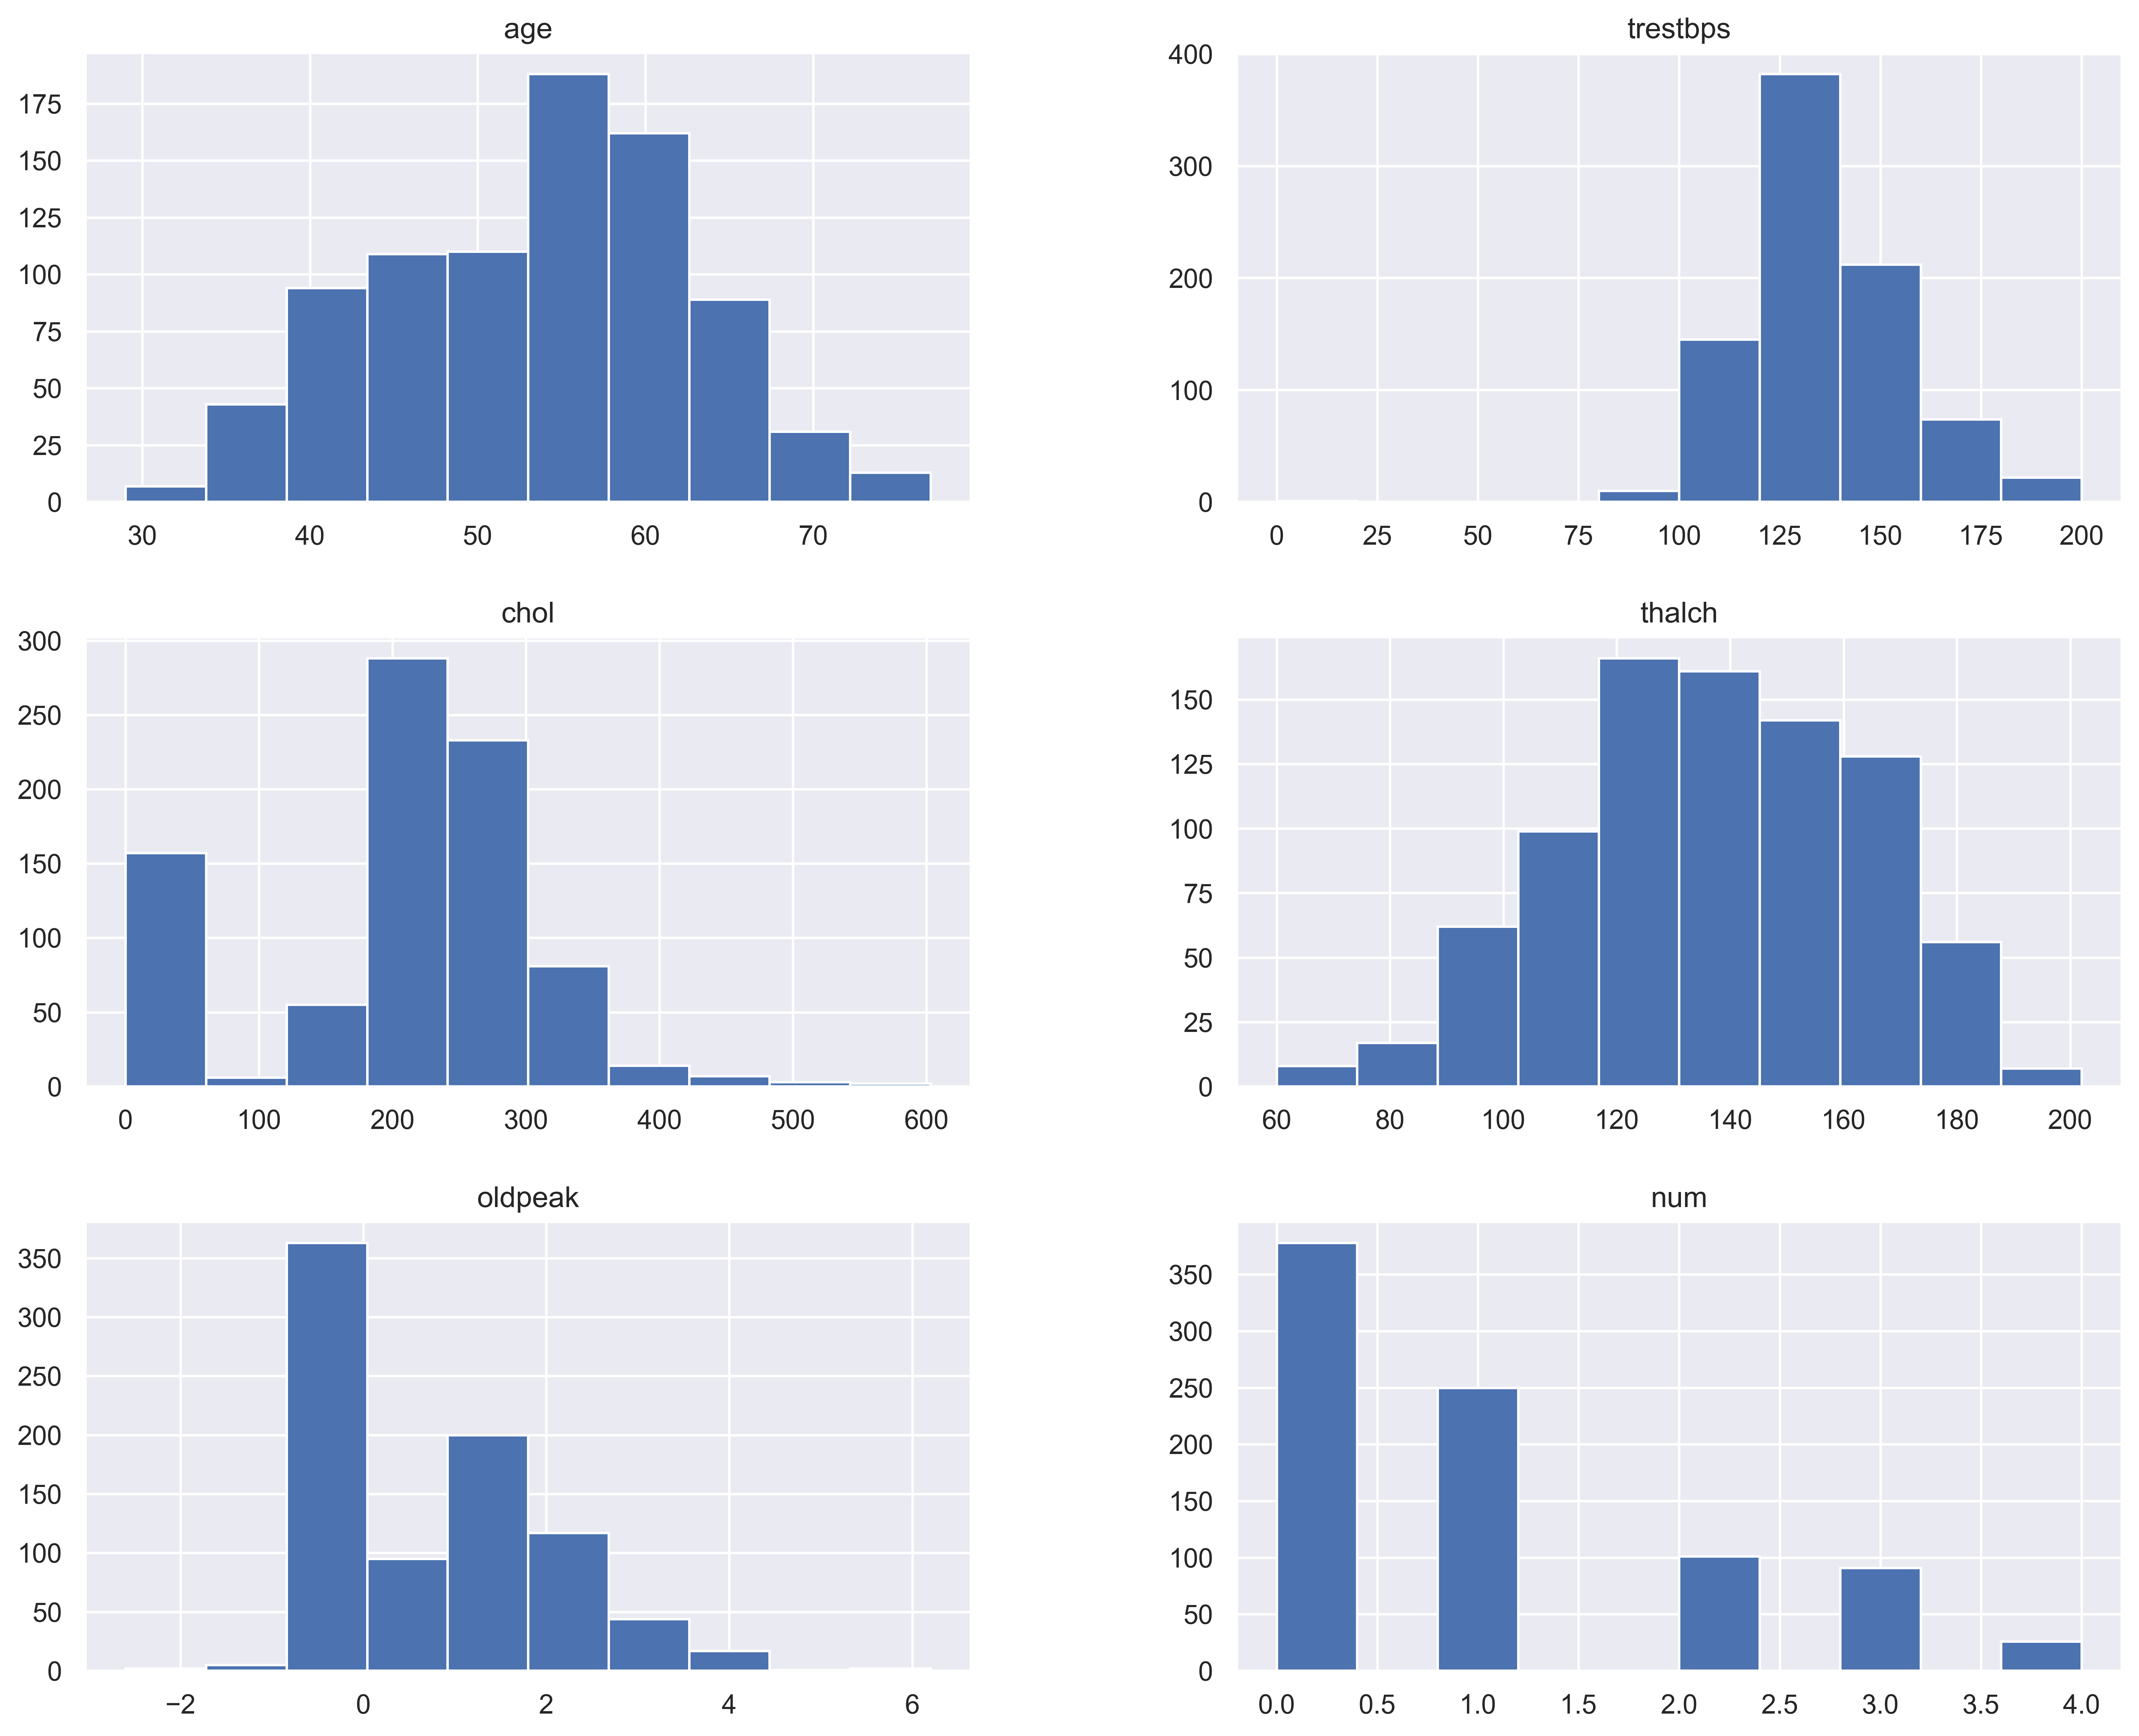

In [7]:
df.hist(figsize=(15, 12))

<Axes: >

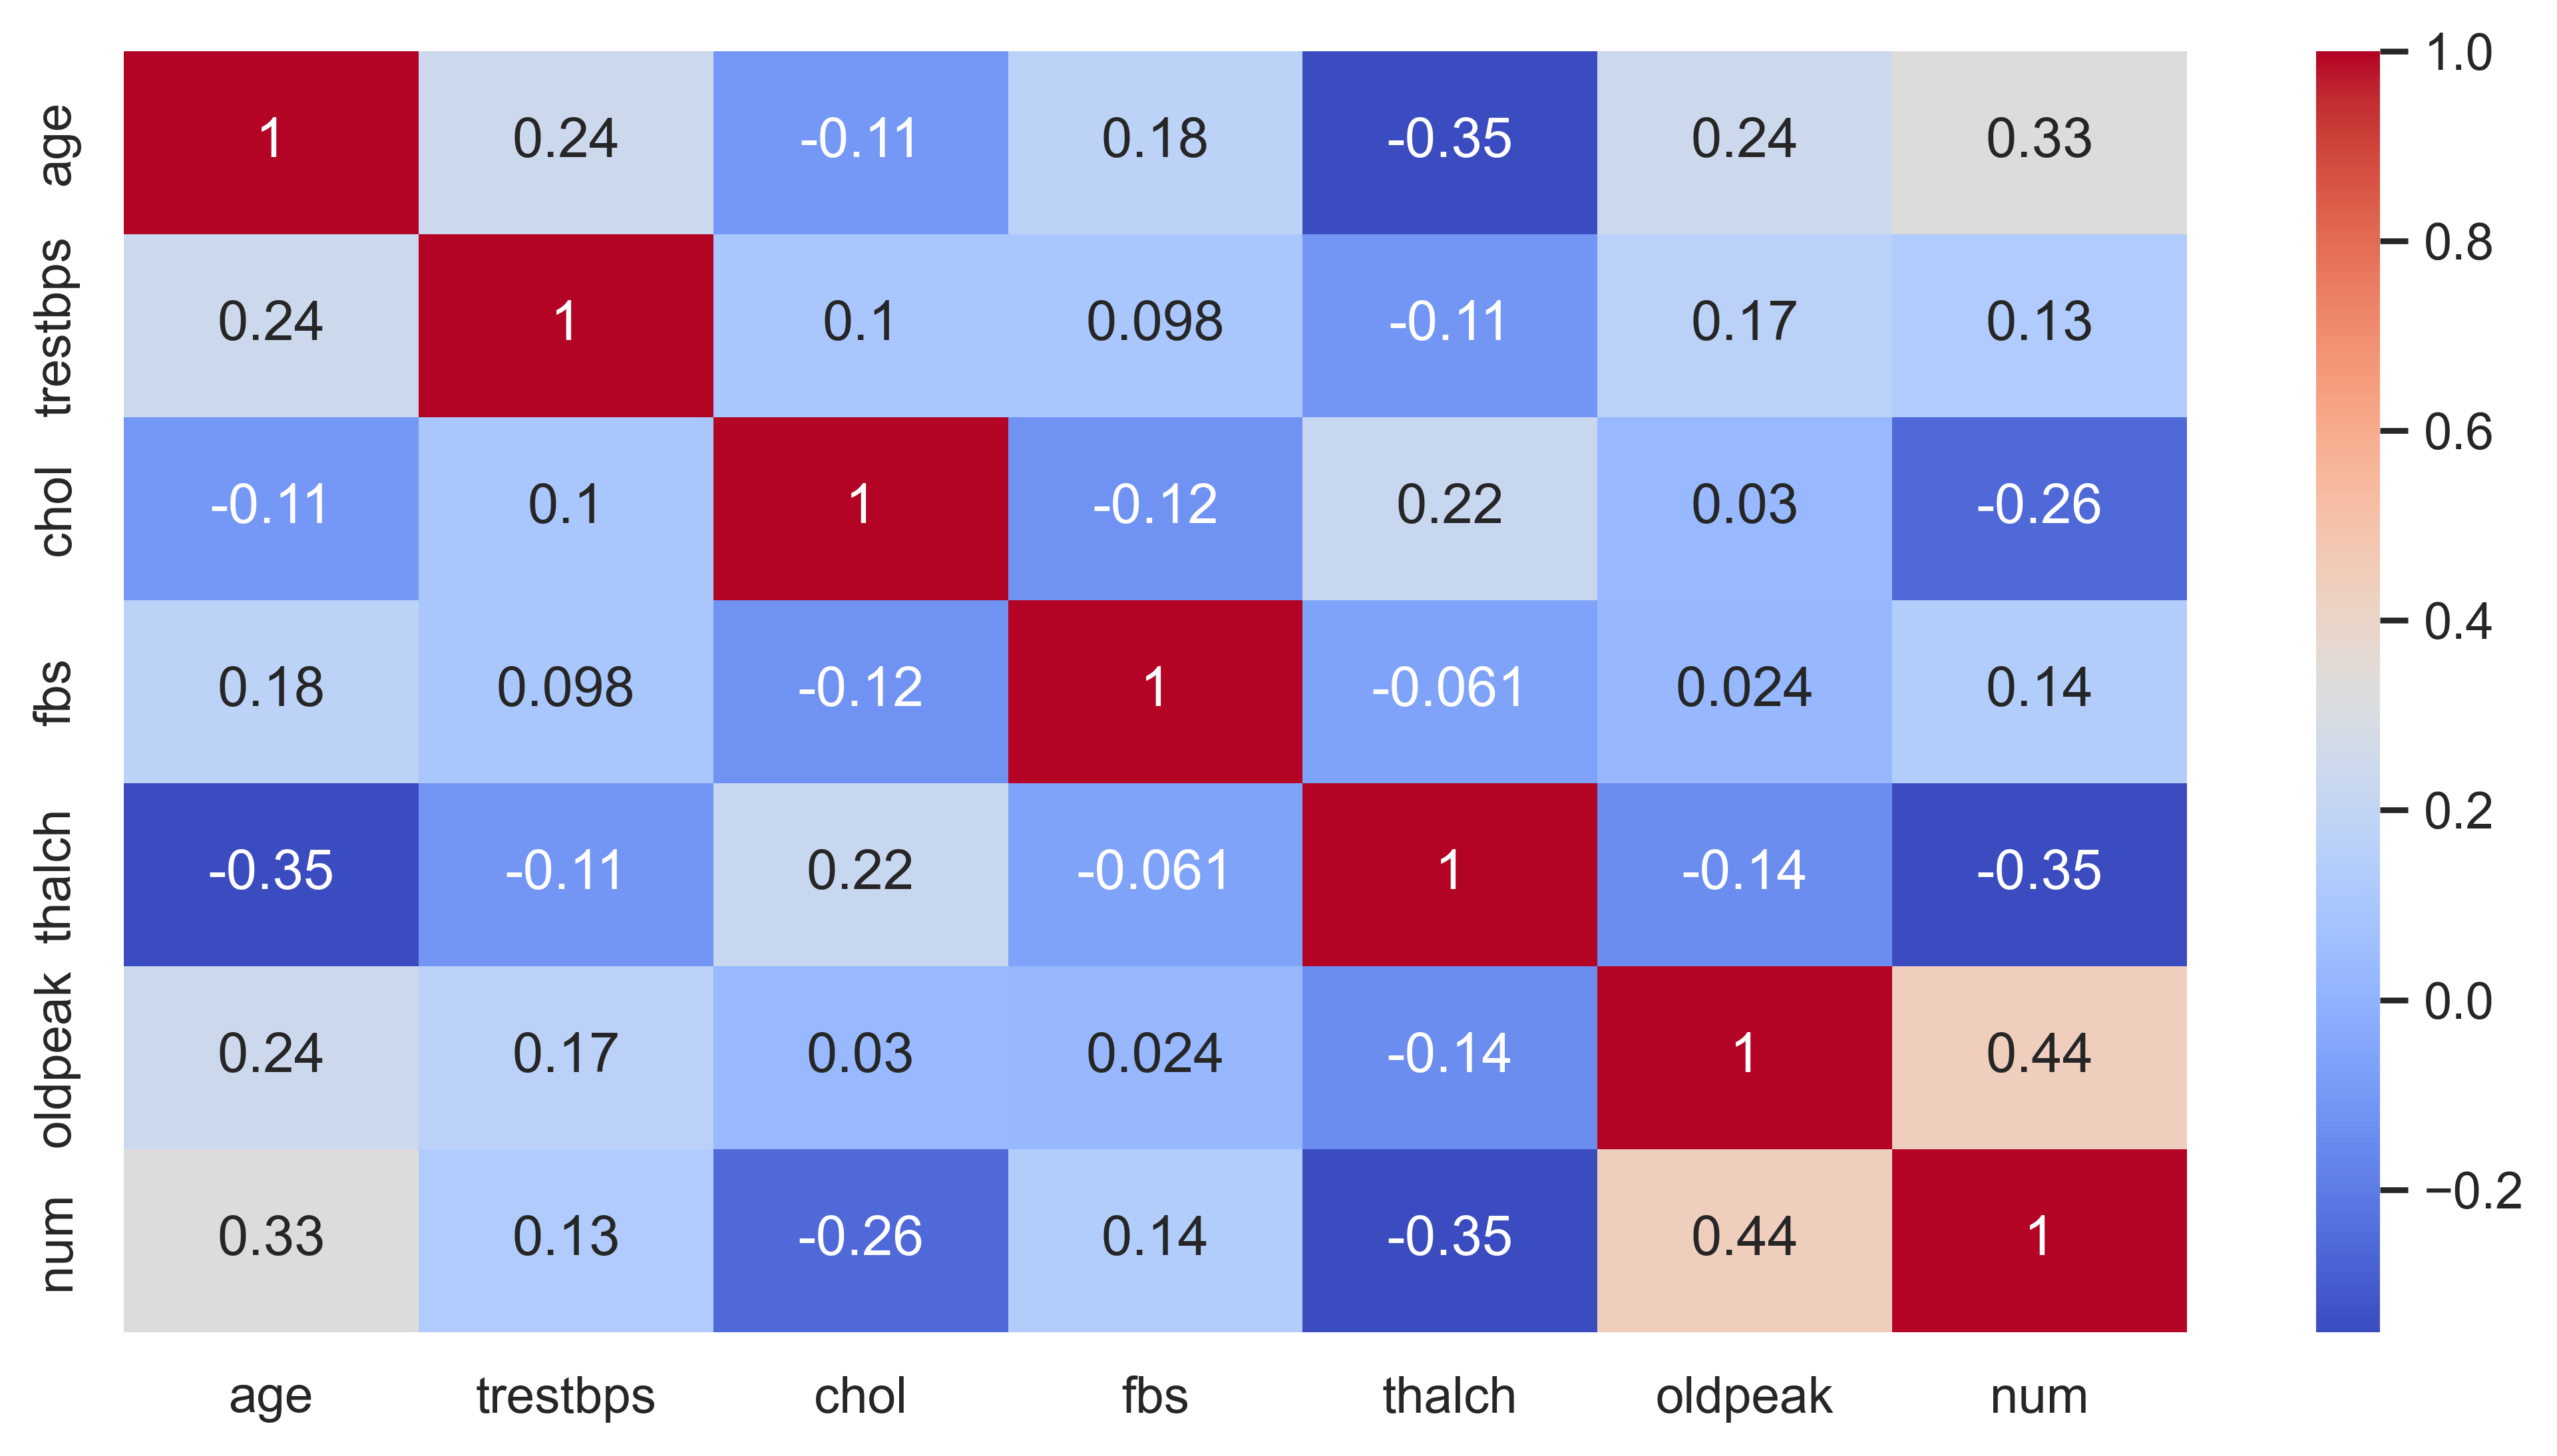

In [8]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

In [85]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,low
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,low
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,low
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,low
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,FALSE,0.0,flat,fixed defect,vv high
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,TRUE,3.0,flat,reversable defect,vv high
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,vv high
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,vv high


In [10]:
transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(),[1,2,5,6,8,10,11],),
    ('tnf2',StandardScaler(),[0,3,4,7,9])
], remainder='passthrough')

In [11]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1', OneHotEncoder(),
                                 [1, 2, 5, 6, 8, 10, 11]),
                                ('tnf2', StandardScaler(), [0, 3, 4, 7, 9])])

# 4. Decision Tree Classification:

In [61]:
df['num'].replace([0,1,2,3,4],['low','medium','high','very high','vv high'], inplace=True)

In [62]:
x = df.drop(columns=['num'])
y = df['num']

In [91]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=142)

In [64]:
xtrain

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
136,51,Male,typical angina,125,213,False,lv hypertrophy,125,TRUE,1.4,upsloping,normal
224,54,Female,atypical angina,120,221,False,normal,138,FALSE,1.0,upsloping,normal
409,39,Male,asymptomatic,110,280,False,normal,150,FALSE,0.0,flat,fixed defect
135,74,Female,atypical angina,120,269,False,lv hypertrophy,121,TRUE,0.2,upsloping,normal
642,62,Male,atypical angina,120,254,False,lv hypertrophy,93,TRUE,0.0,flat,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
751,52,Male,asymptomatic,128,204,True,normal,156,TRUE,1.0,flat,fixed defect
812,57,Male,asymptomatic,130,131,False,normal,115,TRUE,1.2,flat,reversable defect
73,51,Female,non-anginal,120,295,False,lv hypertrophy,157,FALSE,0.6,upsloping,normal
236,46,Female,asymptomatic,130,238,False,normal,90,FALSE,0.0,flat,reversable defect


In [65]:
ytrain

136          low
224          low
409       medium
135          low
642       medium
         ...    
751         high
812    very high
73           low
236          low
38           low
Name: num, Length: 676, dtype: object

In [66]:
pipeline = Pipeline(steps=[
    ('transformer', transformer),
    ('model',DecisionTreeClassifier(random_state=42))
])

In [67]:
pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1', OneHotEncoder(),
                                                  [1, 2, 5, 6, 8, 10, 11]),
                                                 ('tnf2', StandardScaler(),
                                                  [0, 3, 4, 7, 9])])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [68]:
xtest

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
729,52,Male,non-anginal,122,0,False,normal,110,TRUE,2.0,downsloping,normal
377,52,Male,atypical angina,140,100,False,normal,138,TRUE,0.0,downsloping,reversable defect
186,61,Female,atypical angina,140,298,True,normal,120,TRUE,0.0,flat,reversable defect
486,40,Male,asymptomatic,152,223,False,normal,181,FALSE,0.0,upsloping,reversable defect
745,62,Male,asymptomatic,135,297,False,normal,130,TRUE,1.0,flat,fixed defect
...,...,...,...,...,...,...,...,...,...,...,...,...
590,55,Male,atypical angina,160,292,True,normal,143,TRUE,2.0,flat,fixed defect
469,53,Male,asymptomatic,124,243,False,normal,122,TRUE,2.0,flat,reversable defect
458,65,Male,asymptomatic,115,0,False,normal,93,TRUE,0.0,flat,reversable defect
566,56,Male,asymptomatic,150,230,False,st-t abnormality,124,TRUE,1.5,flat,normal


In [69]:
ypred = pipeline.predict(xtest)

ypred

array(['low', 'low', 'very high', 'medium', 'low', 'low', 'medium',
       'medium', 'low', 'medium', 'medium', 'medium', 'low', 'medium',
       'high', 'high', 'medium', 'low', 'low', 'low', 'low', 'low',
       'medium', 'very high', 'low', 'very high', 'low', 'low', 'medium',
       'low', 'low', 'medium', 'medium', 'medium', 'low', 'medium',
       'medium', 'medium', 'low', 'very high', 'very high', 'vv high',
       'low', 'low', 'very high', 'medium', 'medium', 'very high', 'high',
       'low', 'low', 'high', 'medium', 'low', 'very high', 'high', 'low',
       'low', 'very high', 'low', 'medium', 'high', 'low', 'medium',
       'medium', 'medium', 'medium', 'low', 'low', 'medium', 'low', 'low',
       'high', 'low', 'medium', 'medium', 'low', 'low', 'medium',
       'vv high', 'medium', 'high', 'high', 'low', 'medium', 'medium',
       'medium', 'high', 'medium', 'medium', 'medium', 'low', 'low',
       'low', 'low', 'low', 'medium', 'high', 'low', 'medium', 'vv high',
       

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        high       0.33      0.22      0.27        27
         low       0.69      0.71      0.70        76
      medium       0.35      0.38      0.36        48
   very high       0.06      0.08      0.07        13
     vv high       0.14      0.17      0.15         6

    accuracy                           0.47       170
   macro avg       0.32      0.31      0.31       170
weighted avg       0.47      0.47      0.47       170



In [72]:
confusion_matrix(ytest,ypred)

array([[ 6,  6, 11,  3,  1],
       [ 1, 54, 15,  4,  2],
       [ 7, 13, 18,  8,  2],
       [ 2,  3,  6,  1,  1],
       [ 2,  2,  1,  0,  1]], dtype=int64)

In [73]:
pipeline.score(xtrain,ytrain)
pipeline.score(xtest,ytest)

0.47058823529411764

# 5. Hyperparameter Tuning:

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 10, 20, 30, 40, 50],
    'model__min_samples_split': [2, 5, 10, 15, 20]
}

In [76]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

In [77]:
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('tnf1',
                                                                         OneHotEncoder(),
                                                                         [1, 2,
                                                                          5, 6,
                                                                          8, 10,
                                                                          11]),
                                                                        ('tnf2',
                                                                         StandardScaler(),
                                                                         [0, 3,
                                                                          4, 7,
                                                                          9])])),
                                       ('model',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [None, 10, 20, 30, 40, 50],
                         'model__min_samples_split': [2, 5, 10, 15, 20]},
             scoring='accuracy')

In [78]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 20}
Best Score: 0.5191503267973856


In [79]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(xtest)

In [80]:
from sklearn.metrics import accuracy_score, classification_report

In [81]:
accuracy = accuracy_score(ytest, ypred)
report = classification_report(ytest, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.47058823529411764
Classification Report:
              precision    recall  f1-score   support

        high       0.33      0.19      0.24        27
         low       0.73      0.82      0.77        76
      medium       0.35      0.38      0.36        48
   very high       0.00      0.00      0.00        13
     vv high       0.00      0.00      0.00         6

    accuracy                           0.50       170
   macro avg       0.28      0.28      0.27       170
weighted avg       0.48      0.50      0.48       170



# Interview Questions:

What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

In [55]:
#Common hyperparameters of decision tree models include max_depth (limits tree depth to prevent overfitting),
#min_samples_split (minimum samples needed to split a node to avoid overfitting), 
#and min_samples_leaf (minimum samples per leaf to ensure leaves have enough samples and reduce overfitting). 
#Proper tuning balances model complexity and generalization.

What is the difference between the Label encoding and One-hot encoding?

In [ ]:
#Label encoding converts categorical data into integers, assigning a unique integer to each category, suitable for ordinal data. 
#One-hot encoding converts categories into binary vectors, creating separate columns for each category with 1s and 0s, suitable for nominal data.
#The choice depends on whether the categorical data has an inherent order or not.